In [14]:
import pandas as pd
import numpy as np
train_data=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\train.csv')

train_data.head()

x1          x2
0 -1.622420  726.595690
1  1.424165 -276.584355
2  0.709026    4.205381
3  1.175814   -5.317791
4  1.365642 -172.438086

In [15]:
test_data=pd.read_csv(r'C:\Users\garga\3D Objects\ELL784 Assn\Assn1\test.csv',header=None)

test_data.head()

0            1
0 -1.694579  1038.386580
1 -0.850615     5.154652
2  0.297578    15.072852
3  0.801726    47.619410
4 -0.270662    30.490240

In [16]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train_data=scaler.fit_transform(train_data)
train_data=pd.DataFrame(train_data)
test_data=scaler.fit_transform(test_data)
test_data=pd.DataFrame(test_data)

In [17]:
x_train=train_data.iloc[:,0]
y_train=train_data.iloc[:,1]

In [18]:
x_test=test_data.iloc[:,0]
y_test=test_data.iloc[:,1]

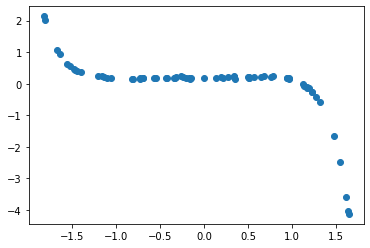

In [19]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train)

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error

### Curve fitting using whole training data

In [23]:
sorted_x_train=np.sort(x_train)
poly1d=PolynomialFeatures(degree=1)
poly2d=PolynomialFeatures(degree=2)
poly3d=PolynomialFeatures(degree=3)
poly4d=PolynomialFeatures(degree=4)
X1 = poly1d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X2 = poly2d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X3 = poly3d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
X4 = poly4d.fit_transform(np.array(sorted_x_train).reshape(-1, 1))
linear_reg_1d = LinearRegression()
linear_reg_2d = LinearRegression()
linear_reg_3d = LinearRegression()
linear_reg_4d = LinearRegression()
f1=linear_reg_1d.fit(X1, y_train)
f2=linear_reg_2d.fit(X2, y_train)
f3=linear_reg_3d.fit(X3, y_train)
f4=linear_reg_4d.fit(X4, y_train)


Coefficients: [-0.04141622]
Intercept: 1.7412995939646748e-17
Error: 69.8799287564149


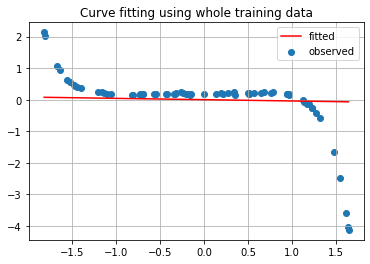

Coefficients: [-0.04462827 -0.02322818]
Intercept: 0.023228177874840914
Error: 69.84701846276073


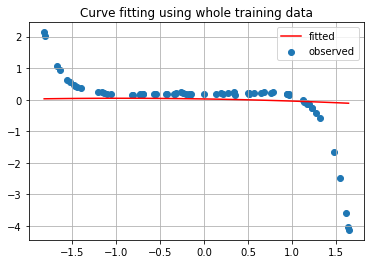

Coefficients: [-0.08387366 -0.01862398  0.02109611]
Intercept: 0.02154120321500595
Error: 69.82549994541566


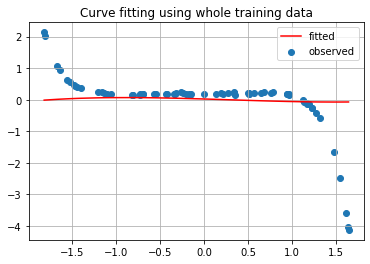

Coefficients: [-0.11357734 -0.44499886  0.05575668  0.16068019]
Intercept: 0.14894413463739453
Error: 68.79813832606834


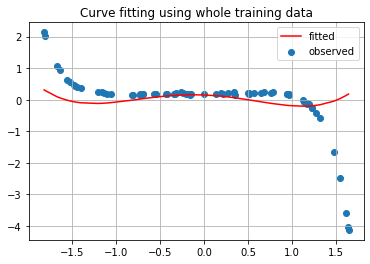

In [24]:
def regression_line(model, coefs, intercept, X_):
    print('Coefficients: {}'.format(coefs))
    print('Intercept: {}'.format(intercept))
    y_pred=model.predict(X_)
    print('Error: {}'.format(np.linalg.norm(y_train - y_pred) ** 2))

    plt.scatter(x_train, y_train, label="observed")
    plt.plot(sorted_x_train,model.predict(X_), c='red', label="fitted")
    plt.title('Curve fitting using whole training data')
    plt.grid()
    plt.legend()
    plt.show()
    
regression_line(linear_reg_1d, linear_reg_1d.coef_[1:], linear_reg_1d.intercept_, X1)
regression_line(linear_reg_2d, linear_reg_2d.coef_[1:], linear_reg_2d.intercept_, X2)
regression_line(linear_reg_3d, linear_reg_3d.coef_[1:], linear_reg_3d.intercept_, X3)
regression_line(linear_reg_4d, linear_reg_4d.coef_[1:], linear_reg_4d.intercept_, X4)

### Prediction using test data

[-0.62386009]
3.6631812078359883e-17
Error: 0.6952111762755008


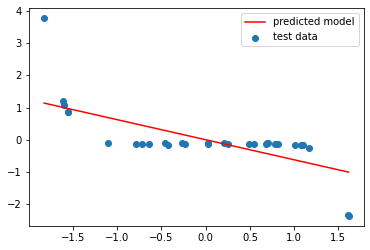

In [25]:
from sklearn.metrics import mean_squared_error
M=1
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test_plot = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))
X_test_error = poly.transform(np.array(x_test).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)
y_pred_plot=linear_reg.predict(X_test_plot)
y_pred_error=linear_reg.predict(X_test_error)
print('Error:',np.sqrt(mean_squared_error(y_test,y_pred_error)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred_plot,c='red',label='predicted model')
plt.legend()
plt.show()


[-0.67090359 -0.34019849]
0.34019848749846165
Error: 0.8096661820556131


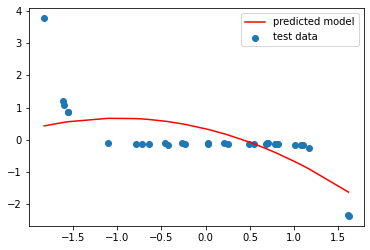

In [26]:
from sklearn.metrics import mean_squared_error
M=2
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test_plot = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))
X_test_error = poly.transform(np.array(x_test).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)
y_pred_plot=linear_reg.predict(X_test_plot)
y_pred_error=linear_reg.predict(X_test_error)
print('Error:',np.sqrt(mean_squared_error(y_test,y_pred_error)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred_plot,c='red',label='predicted model')
plt.legend()
plt.show()


[ 0.72610906 -0.50409349 -0.7509554 ]
0.4002494858168671
Error: 0.5097475780615076


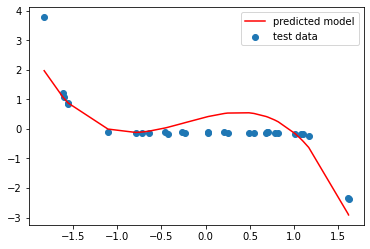

In [27]:
from sklearn.metrics import mean_squared_error
M=3
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test_plot = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))
X_test_error = poly.transform(np.array(x_test).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)
y_pred_plot=linear_reg.predict(X_test_plot)
y_pred_error=linear_reg.predict(X_test_error)
print('Error:',np.sqrt(mean_squared_error(y_test,y_pred_error)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred_plot,c='red',label='predicted model')
plt.legend()
plt.show()


[ 0.77373851  0.1795931  -0.80653317 -0.25764861]
0.19596053900854615
Error: 0.5926729978526103


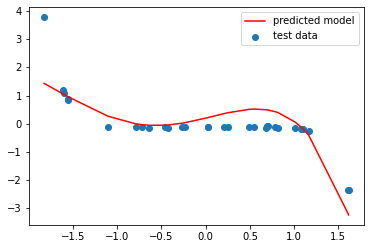

In [28]:
from sklearn.metrics import mean_squared_error
M=4
poly=PolynomialFeatures(degree=M)
X = poly.fit_transform(np.array(x_train).reshape(-1, 1))
X_test_plot = poly.transform(np.array(np.sort(x_test)).reshape(-1, 1))
X_test_error = poly.transform(np.array(x_test).reshape(-1, 1))


linear_reg = LinearRegression()
f=linear_reg.fit(X, y_train)
coef=linear_reg.coef_[1:]
intercept=linear_reg.intercept_
print(coef)
print(intercept)
y_pred_plot=linear_reg.predict(X_test_plot)
y_pred_error=linear_reg.predict(X_test_error)
print('Error:',np.sqrt(mean_squared_error(y_test,y_pred_error)))


plt.scatter(x_test,y_test,label='test data')
plt.plot(np.sort(x_test),y_pred_plot,c='red',label='predicted model')
plt.legend()
plt.show()
